In [ ]:
import cv2

# Load the image
image = cv2.imread('KCN_1_Elv_P.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Method 1: Apply Median Blur to reduce noise
blurred_image = cv2.medianBlur(image, 5)
if gray_image is None or blurred_image is None:
    print("Error: One or both images could not be loaded.")
else:
    # Check if both images have the same dimensions
    if gray_image.shape == blurred_image.shape:
        # Add the two images together
        result = cv2.add(gray_image, blurred_image)
    else:
      print("shape issue")

shape issue


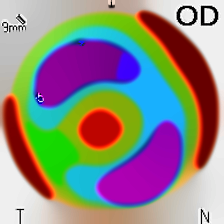

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Load the noisy image
noisy_image = cv2.imread('KCN_1_Elv_P.jpg')

# Apply Non-Local Means Denoising multiple times
denoised_image = noisy_image.copy()
for i in range(50):
    denoised_image = cv2.fastNlMeansDenoisingColored(denoised_image, None, h=18, hColor=9, templateWindowSize=7, searchWindowSize=25)
cv2.imwrite('filtered.jpg' , denoised_image)
# Display the original and denoised images

cv2_imshow(denoised_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

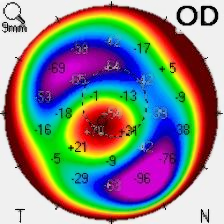

In [ ]:
import cv2

# Load the original image
original_image = cv2.imread('KCN_1_Elv_P.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to create a binary mask
_, binary_mask = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Apply median blur to the original image
blurred_image = cv2.medianBlur(original_image, 5)

# Replace white pixels in the original image with corresponding pixels from the blurred image
result_image = original_image.copy()
result_image[binary_mask == 255] = blurred_image[binary_mask == 255]

# Display the result
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

best model

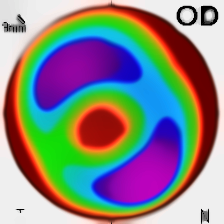

True

In [ ]:
import cv2

# Load the original image
original_image = cv2.imread('KCN_1_Elv_P.jpg')

# Define the number of iterations
num_iterations = 10

# Loop for the specified number of iterations
for i in range(num_iterations):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale image to create a binary mask
    _, binary_mask = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Apply median blur to the original image
    blurred_image = cv2.medianBlur(original_image, 5)

    # Replace white pixels in the original image with corresponding pixels from the blurred image
    result_image = original_image.copy()
    result_image[binary_mask == 255] = blurred_image[binary_mask == 255]

    # Update the original image with the result for the next iteration
    original_image = result_image

h = 22             # Strength of the noise reduction. Higher values mean more aggressive denoising.
hForColor = 15     # Strength of the noise reduction for color components.
templateWindowSize = 7  # Size in pixels of the template patch.
searchWindowSize = 25   # Size in pixels of the window used to compute the weighted average for a given pixel.

for i in range(5):
    templateWindowSize = templateWindowSize if templateWindowSize % 2 == 1 else templateWindowSize + 1
    searchWindowSize = searchWindowSize if searchWindowSize % 2 == 1 else searchWindowSize + 1

    denoised_image = cv2.fastNlMeansDenoisingColored(result_image, None, h, hForColor, templateWindowSize, searchWindowSize)

    result_image = denoised_image


cv2.imwrite('denoised_image.jpg', denoised_image)
cv2_imshow(denoised_image)
# Display the final result
cv2.imwrite('2_filter.jpg' , denoised_image)

black color the corners

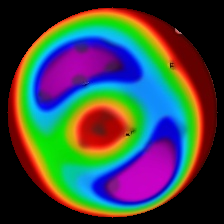

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('2_filter.jpg')

# Get image dimensions
height, width = image.shape[:2]

# Define the center of the circle
center_x = width // 2
center_y = height // 2

# Define the radius of the circle
# radius = min(width, height)//2  # Adjust the radius as needed
radius = 105
# Create a mask to represent the circle
mask = np.zeros((height, width), dtype=np.uint8)
cv2.circle(mask, (center_x, center_y), radius, 255, -1)  # -1 fills the circle

# Invert the mask
mask_inv = cv2.bitwise_not(mask)

# Set the corresponding pixels in the image outside the circle to black
image[mask_inv == 255] = [0, 0, 0]

# Display the result
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

filters together (best params)

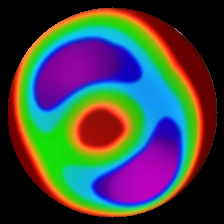

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

original_image = cv2.imread('KCN_1_Elv_P.jpg')
num_iterations = 1

for i in range(num_iterations):
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    blurred_image = cv2.medianBlur(original_image, 5)
    result_image = original_image.copy()
    result_image[binary_mask == 255] = blurred_image[binary_mask == 255]
    original_image = result_image

h = 22             # Strength of the noise reduction. Higher values mean more aggressive denoising.
hForColor = 15     # Strength of the noise reduction for color components.
templateWindowSize = 7  # Size in pixels of the template patch.
searchWindowSize = 25   # Size in pixels of the window used to compute the weighted average for a given pixel.

for i in range(5):
    templateWindowSize = templateWindowSize if templateWindowSize % 2 == 1 else templateWindowSize + 1
    searchWindowSize = searchWindowSize if searchWindowSize % 2 == 1 else searchWindowSize + 1

    denoised_image = cv2.fastNlMeansDenoisingColored(result_image, None, h, hForColor, templateWindowSize, searchWindowSize)

    result_image = denoised_image
image = result_image
height, width = image.shape[:2]

center_x = width // 2
center_y = height // 2

radius = 105
mask = np.zeros((height, width), dtype=np.uint8)
cv2.circle(mask, (center_x, center_y), radius, 255, -1)

mask_inv = cv2.bitwise_not(mask)

image[mask_inv == 255] = [0, 0, 0]

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from skimage.metrics import structural_similarity as ssim
image_to_sim1 = cv2.imread('KCN_1_Elv_P.jpg')
gray_pic1 = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)
gray_pic2 = cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)
ssim_index = ssim(gray_pic1, gray_pic2)
cv2_imshow(result_image)
cv2_imshow(denoised_image)
print(ssim_index)

NameError: name 'result_image' is not defined

In [ ]:
def denoise_image(image_path , h , hForColor , templateWindowSize , searchWindowSize , epochs):
  import cv2
  import numpy as np

  original_image = cv2.imread(image_path)
  num_iterations = 1

  for i in range(num_iterations):
      gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
      _, binary_mask = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
      blurred_image = cv2.medianBlur(original_image, 5)
      result_image = original_image.copy()
      result_image[binary_mask == 255] = blurred_image[binary_mask == 255]
      original_image = result_image

  h = h             # Strength of the noise reduction. Higher values mean more aggressive denoising.
  hForColor = hForColor     # Strength of the noise reduction for color components.
  templateWindowSize = templateWindowSize  # Size in pixels of the template patch.
  searchWindowSize = searchWindowSize   # Size in pixels of the window used to compute the weighted average for a given pixel.

  for i in range(epochs):
      templateWindowSize = templateWindowSize if templateWindowSize % 2 == 1 else templateWindowSize + 1
      searchWindowSize = searchWindowSize if searchWindowSize % 2 == 1 else searchWindowSize + 1

      denoised_image = cv2.fastNlMeansDenoisingColored(result_image, None, h, hForColor, templateWindowSize, searchWindowSize)

      result_image = denoised_image
  image = result_image
  height, width = image.shape[:2]

  center_x = width // 2
  center_y = height // 2

  radius = 105
  mask = np.zeros((height, width), dtype=np.uint8)
  cv2.circle(mask, (center_x, center_y), radius, 255, -1)

  mask_inv = cv2.bitwise_not(mask)

  image[mask_inv == 255] = [0, 0, 0]
  return image


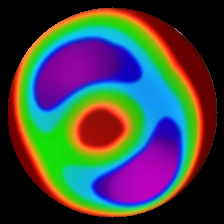

In [ ]:
filteeer1 = denoise_image(image_path = 'KCN_1_Elv_P.jpg' , h = 22 , hForColor = 15 , templateWindowSize = 7 , searchWindowSize = 25 , epochs = 5)
cv2_imshow(filteeer1)

In [ ]:
def similarity_2picture(image1 , image2):
  from skimage.metrics import structural_similarity as ssim
  gray_pic1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  gray_pic2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
  ssim_index = ssim(gray_pic1, gray_pic2)
  return ssim_index


0.6572358880039176


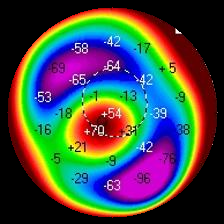

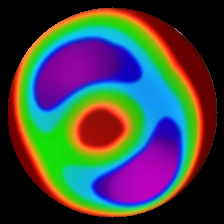

In [ ]:
image = cv2.imread('KCN_1_Elv_P.jpg')
height, width = image.shape[:2]

center_x = width // 2
center_y = height // 2

radius = 105
mask = np.zeros((height, width), dtype=np.uint8)
cv2.circle(mask, (center_x, center_y), radius, 255, -1)

mask_inv = cv2.bitwise_not(mask)

image[mask_inv == 255] = [0, 0, 0]
A = similarity_2picture(image1 = image , image2 = filteeer1)
print(A)
cv2_imshow(image)
cv2_imshow(filteeer1)

In [ ]:
def parameter_search(image_name):
  import numpy as np
  image_org = cv2.imread(image_name)
  height, width = image_org.shape[:2]

  center_x = width // 2
  center_y = height // 2

  radius = 105
  mask = np.zeros((height, width), dtype=np.uint8)
  cv2.circle(mask, (center_x, center_y), radius, 255, -1)

  mask_inv = cv2.bitwise_not(mask)

  image_org[mask_inv == 255] = [0, 0, 0]
  for i in range(7):
    for j in range(7):
        image_den = denoise_image(image_path = image_name , h = 15+i , hForColor = 8+j , templateWindowSize = 7 , searchWindowSize = 25 , epochs = 5)
        A = similarity_2picture(image1 = image_org , image2 = image_den)
        if A > 0.6 and A < 0.7:
          print(similarity_2picture(image1 = image_org , image2 = image_den))
          print(f" h = {15+i} | hForColor = {7+j}")


In [ ]:
parameter_search('KCN_1_Sag_A.jpg')

0.6991825080502527
 h = 15 | hForColor = 8
0.6984049498060129
 h = 15 | hForColor = 9
0.697749159645839
 h = 15 | hForColor = 10
0.6969295568797215
 h = 15 | hForColor = 11
0.6958019913519093
 h = 15 | hForColor = 12
0.6947370491791496
 h = 15 | hForColor = 13
0.6925947834571685
 h = 16 | hForColor = 7
0.6911712519808387
 h = 16 | hForColor = 8
0.6901179910259546
 h = 16 | hForColor = 9
0.6893676534282501
 h = 16 | hForColor = 10
0.6884742528315262
 h = 16 | hForColor = 11
0.6875337225713574
 h = 16 | hForColor = 12
0.6863214496120034
 h = 16 | hForColor = 13
0.6862474677121365
 h = 17 | hForColor = 7
0.6843822076048306
 h = 17 | hForColor = 8
0.6833130231063813
 h = 17 | hForColor = 9
0.6825695587965889
 h = 17 | hForColor = 10
0.6815552283111189
 h = 17 | hForColor = 11
0.6806834084173775
 h = 17 | hForColor = 12
0.6791857268362252
 h = 17 | hForColor = 13
0.6801610947876919
 h = 18 | hForColor = 7
0.678189645387599
 h = 18 | hForColor = 8
0.676934794494198
 h = 18 | hForColor = 9
0.